30 April 2021 GC, R code to make output violin plot

In [1]:
#install.packages("RColorBrewer")

In [2]:
library("readxl")
library('data.table')
library("ggplot2")
library("SparseM")
library("quantreg")
library("plyr")   
library("dplyr")


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
read_diff_SL <- function(path_in, sht) {
  dt <- read_excel(path_in, sheet = sht)
  dt <- dt[ -c(1, 4, 5, 6, 7, 8, 9, 21, 22)]
  # rename columns
  clm = colnames(dt)
  clm= clm[-c(1, 2)]
  newco <- c()
  for (fb in clm){
      f <- strsplit(fb, "_")[[1]][1]
      newco <- c(newco, f)
  }   

newco <- c('Study_ID', 'Device', newco)
print(newco)
colnames(dt) <- newco
  return(dt)
}

In [4]:
path1 <- '/media/guido/LACIE/Cingle_Guido/Master/Headband/Diff_SL.xlsx'
sht1 <- 'Diff_SL_65dB_270deg'

In [5]:
dsl <- read_diff_SL(path1, sht1)

New names:
* `` -> ...1



 [1] "Study_ID" "Device"   "500"      "630"      "800"      "1000"    
 [7] "1250"     "1600"     "2000"     "2500"     "3150"     "4000"    
[13] "5000"    


In [6]:
bh5 <- dsl[dsl$Device == 'BAHA5P',]
bh5 <- subset(bh5, select = -c(Device))
sbj <- seq(from = 1, to = nrow(bh5))
bh5$BAHA5P_group <- sbj
bh5_long <- melt(setDT(bh5), id.vars = c('Study_ID', 'BAHA5P_group'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')
bh5_long

Study_ID,BAHA5P_group,Frequency_band,Diff_SL
<dbl>,<int>,<fct>,<dbl>
21,1,500,-34
38,2,500,-41
48,3,500,-57
52,4,500,-34
54,5,500,-41
55,6,500,-48
56,7,500,-46
57,8,500,-56
58,9,500,-23


In [7]:
q <- t(do.call("rbind", tapply(bh5_long$Diff_SL, bh5_long$Frequency_band, quantile, c(0.1, 0.5, 0.9))))
q <- as.data.frame(q)
p <- c("P10", "P50", "P90")
q$Percentile <- p
q

,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,Percentile
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10%,-58,-47.5,-38.0,-38.0,-34.5,-30,-31.5,-28.0,-27.5,-32.5,-48.5,P10
50%,-49,-39.5,-29.5,-28.5,-26.0,-24,-22.0,-20.5,-19.0,-21.0,-38.0,P50
90%,-38,-29.0,-24.0,-21.0,-19.0,-18,-12.5,-12.5,-7.0,-3.5,-20.0,P90


In [8]:
P10 = q %>% slice(1)
P50 = q %>% slice(2)
P90 = q %>% slice(3)

In [9]:
P10_long <- melt(setDT(P10), id.vars = c('Percentile'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')
P50_long <- melt(setDT(P50), id.vars = c('Percentile'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')
P90_long <- melt(setDT(P90), id.vars = c('Percentile'), 
                 value.name = 'Diff_SL', variable.name = 'Frequency_band')

In [10]:
# Make plots wider 
options(repr.plot.width=8, repr.plot.height=6)

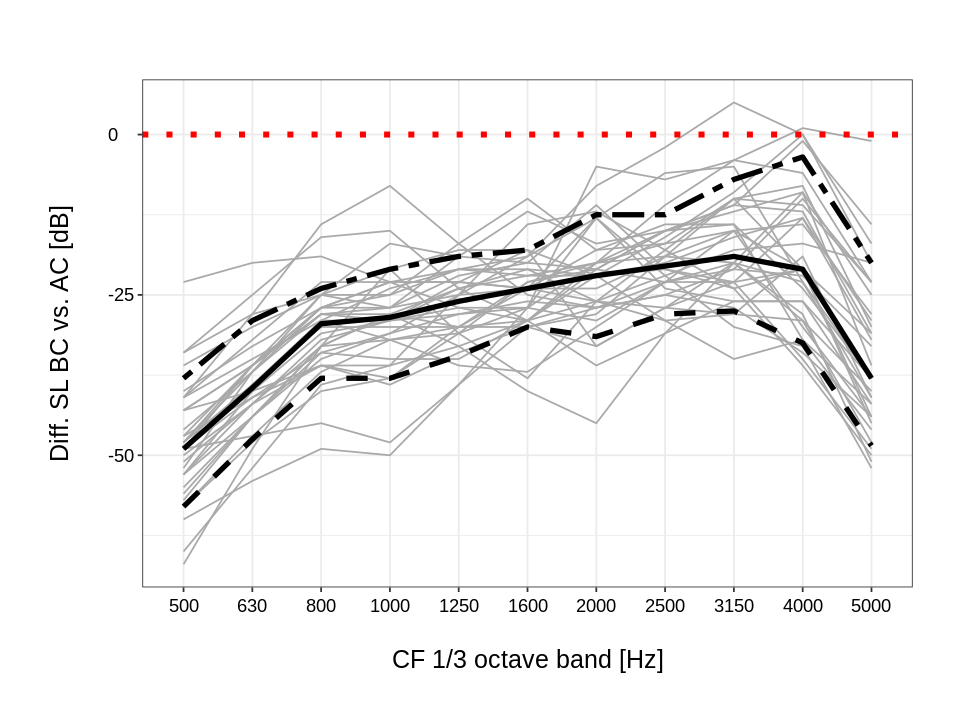

In [11]:
ttl = 'BAHA5P-group (N=36): diff. SL BC vs. AC-path, ISTS 65 dB, at BCD-side'

p <- ggplot(bh5_long, aes(x=Frequency_band, y=Diff_SL, group=Study_ID, colour=BAHA5P_group)) + 
  geom_line(aes(group=Study_ID), colour="darkgray") + theme_bw() +
  geom_hline(yintercept=0, linetype="dotted", color = "red", size = 1.7)
p <- p + geom_line(P10_long, mapping = aes(x=Frequency_band, y=Diff_SL, group = Percentile), colour="black", size=1.5, linetype='dashed')
p <- p + geom_line(P50_long, mapping = aes(x=Frequency_band, y=Diff_SL, group = Percentile), colour="black", size=1.5, linetype='solid')
p <- p + geom_line(P90_long, mapping = aes(x=Frequency_band, y=Diff_SL, group = Percentile), colour="black", size=1.5, linetype='twodash')
p <- p + ggtitle("") + xlab("CF 1/3 octave band [Hz]") + ylab("Diff. SL BC vs. AC [dB]")
p <- p + theme(plot.margin = margin(1, 1, 1, 1, "cm"), 
               plot.title = element_text(colour="black", size=16, face="bold", hjust=0.5, vjust=1),
               axis.title.x = element_text(colour="black", size=15, face="plain", hjust=0.5, margin = margin(t = .8, r = 0, b = 0, l = 0, 'cm')), 
               axis.title.y = element_text(colour="black", size=15, face="plain", hjust=0.5, vjust=0.5, margin = margin(t = 0, r = .8, b = 0, l = 0, 'cm')),
               axis.text.x = element_text(colour = "black", size = 11, vjust=0), 
               axis.text.y = element_text(colour = "black", size = 11, hjust=0),
               legend.position = "none")
#legend.position = c(0.8, 0.19)
#legend.background = element_rect(size=0.3, linetype="solid", colour ="black"),
#legend.title = element_text(colour="black", size=14, face="plain", margin=margin(0.25, 0.25, 0, 1.1, 'cm')), 
#legend.text = element_text(colour="black", size=12, margin=margin(0.25, 0.25, 0.25, 0.25, 'cm')), 
#legend.margin = margin(0.25, 0.25, 0.25, 0.25, 'cm'),

p

In [12]:
tiff("/home/guido/R/cingle/figures/new/diff_SL_270deg_BH5.tiff", units="in", width=8, height=6, res=300)
p
dev.off()

png 
  2